In [299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

In [300]:
df = pd.read_csv('heart_disease_uci.csv')

print(df.shape)
print(df.isnull().sum())
df.info()
display(df.head())
display(df.describe())

(920, 16)
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [301]:
null_count = df.isnull().sum()
df_null_perc = (null_count / len(df)) *100
display(df_null_perc)

id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     6.413043
chol         3.260870
fbs          9.782609
restecg      0.217391
thalch       5.978261
exang        5.978261
oldpeak      6.739130
slope       33.586957
ca          66.413043
thal        52.826087
num          0.000000
dtype: float64

In [302]:
def IQR_ULB( column: str, df:pd.DataFrame = df):
    data = df[column]
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    outliers = df[(data<lower_bound) | (data>upper_bound)]
    
    z_scores = zscore(data)
    outliers_z = df[np.abs(z_scores > 3)]
    
    return {
    'column': column,
    'Q1': Q1,
    'Q3': Q3,
    'IQR': IQR,
    'lower_bound': lower_bound,
    'upper_bound': upper_bound,
    'outliers': len(outliers),
    'outliers_z': len(outliers_z)
}

In [303]:
def BarPlotShow(column: str, new: bool = 0, df:pd.DataFrame = df):
    data = df[column]
    plt.boxplot(data, vert=False, patch_artist=True)
    if new == 1:
        plt.title(f'Boxplot of {column} after Outliers')
    else:
        plt.title(f'Boxplot of {column}')        
    plt.xlabel({column})
    plt.show()

In [304]:
def FillNan(column: str, df:pd.DataFrame = df):
    data = df[col]
    return data.fillna(data.mode()[0])

----------------------------------------------------------------------------------------------------


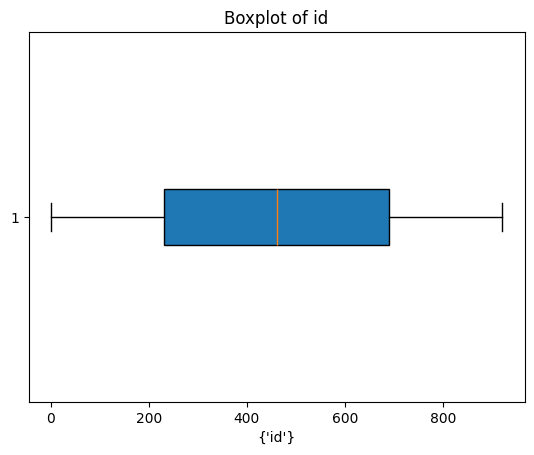

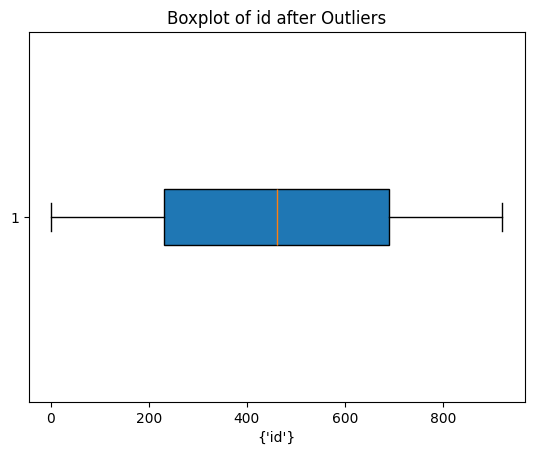

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


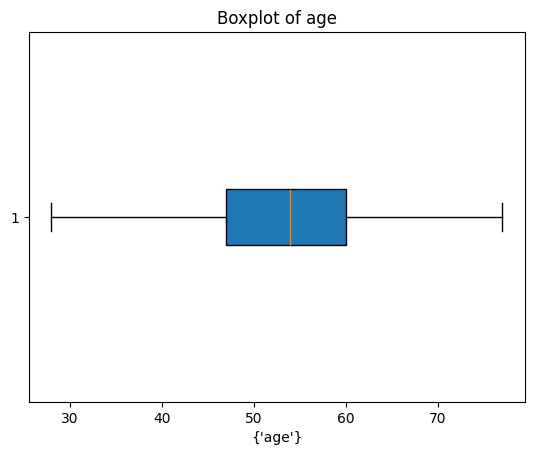

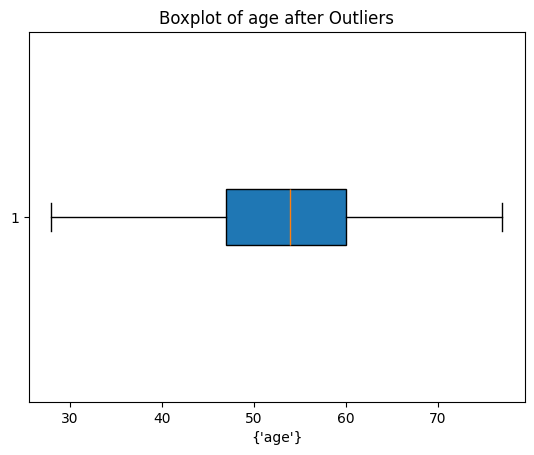

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


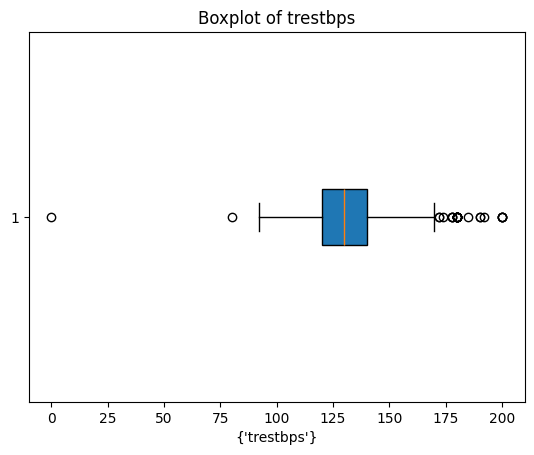

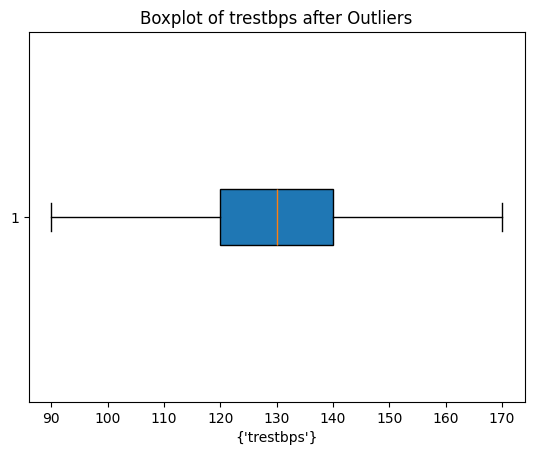

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


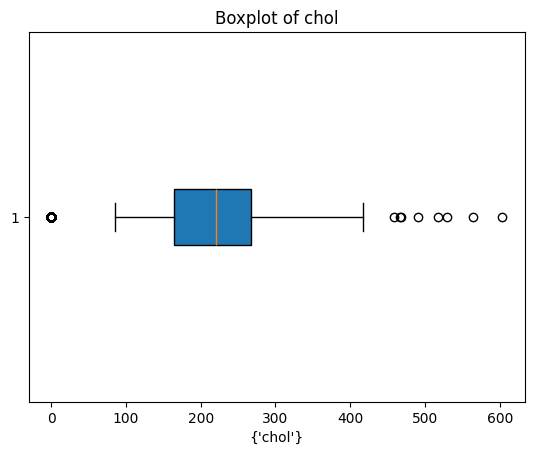

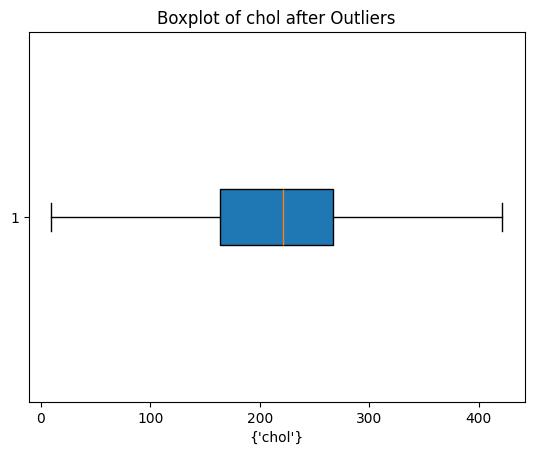

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


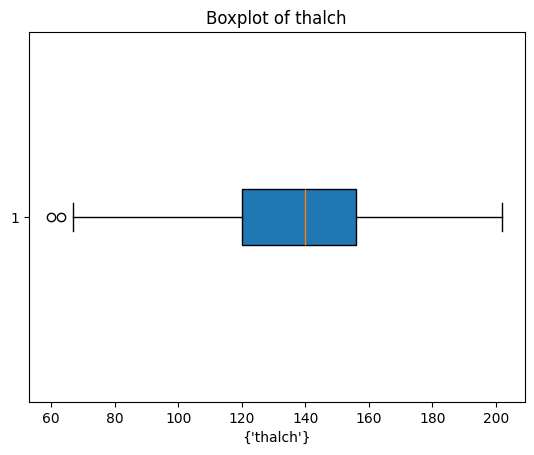

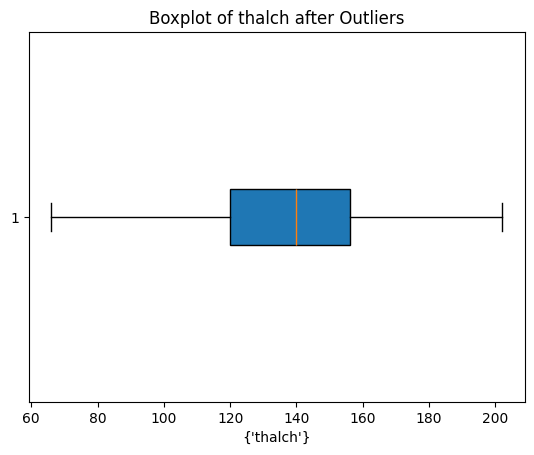

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


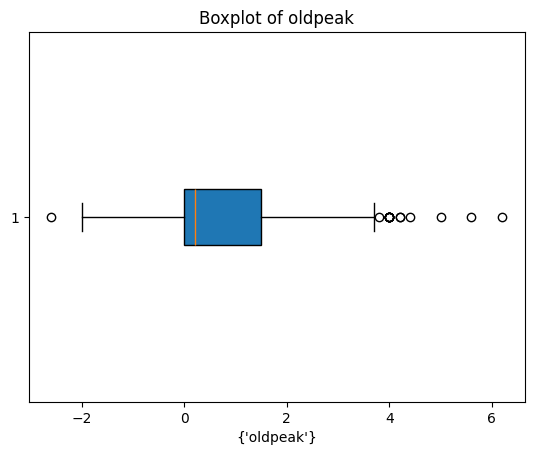

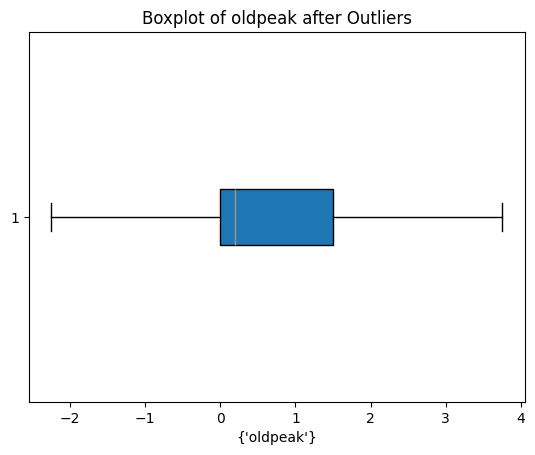

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


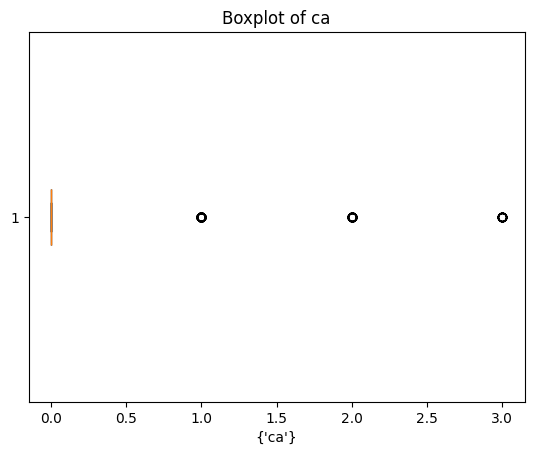

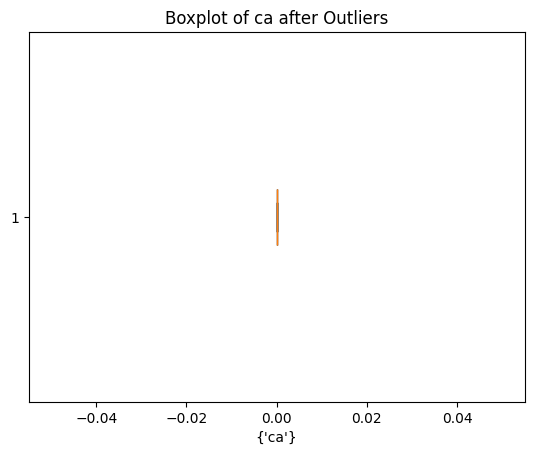

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


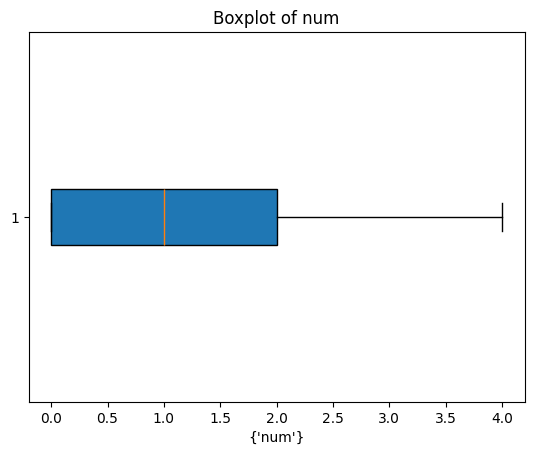

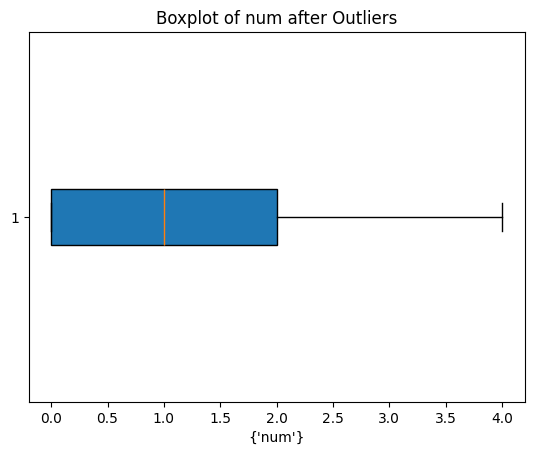

----------------------------------------------------------------------------------------------------


C:\Users\ataka\AppData\Local\Temp\ipykernel_10652\162934812.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return data.fillna(data.mode()[0])


In [305]:
df_numeric = df.select_dtypes(['int','float']).columns
df_categoric = df.select_dtypes(['object']).columns
chart = []
for col in df_numeric:
    df[col] = FillNan(col, df)
    a = IQR_ULB(column= col, df= df)
    column, Q1, Q3, IQR, lower_bound, upper_bound, outliers, outliers_z = a.values()
    chart.append(a)
    print(100*'-')
    BarPlotShow(column=col,new=0,df=df)
    df[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
    BarPlotShow(column=col,new = 1, df=df)
    print(100*'-')

for col in df_categoric:
    df[col] = FillNan(col, df)
    
numeric_df = pd.DataFrame(chart)
numeric_df.set_index(numeric_df.column, drop=True, inplace=True)
numeric_df.drop('column', axis=1, inplace=True)

In [306]:
numeric_df

,Q1,Q3,IQR,lower_bound,upper_bound,outliers,outliers_z
column,,,,,,,
id,230.75,690.25,459.5,-458.50,1379.50,0,0
age,47.00,60.00,13.0,27.50,79.50,0,0
trestbps,120.00,140.00,20.0,90.00,170.00,28,7
chol,164.00,267.00,103.0,9.50,421.50,210,2
thalch,120.00,156.00,36.0,66.00,210.00,2,0
oldpeak,0.00,1.50,1.5,-2.25,3.75,16,6
ca,0.00,0.00,0.0,0.00,0.00,128,20
num,0.00,2.00,2.0,-3.00,5.00,0,0


<BarContainer object of 8 artists>

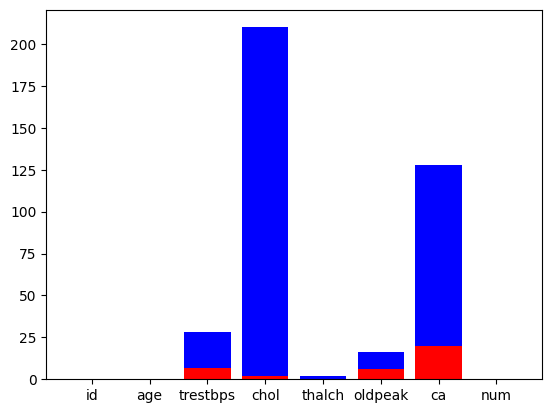

In [307]:
plt.bar(height=numeric_df['outliers'], x=numeric_df.index,color='b') # Mavi renkli olanlar IQR outliers 
plt.bar(height=numeric_df['outliers_z'], x=numeric_df.index, color='r') # Kirmizi renkli olanlar ise Z-score a gore outlier degerler

In [310]:
df.info(), display(df.head()) # Bos degerimiz kalmadi artik train ve test veri setine ayirabiliriz.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       920 non-null    bool   
 8   restecg   920 non-null    object 
 9   thalch    920 non-null    float64
 10  exang     920 non-null    bool   
 11  oldpeak   920 non-null    float64
 12  slope     920 non-null    object 
 13  ca        920 non-null    float64
 14  thal      920 non-null    object 
 15  num       920 non-null    int64  
dtypes: bool(2), float64(5), int64(3), object(6)
memory usage: 102.6+ KB


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,0.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,0.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


(None, None)

In [311]:
label = df['']
features = 
train_x, test_x, train_y, test_y = train_test_split()

ValueError: At least one array required as input